In [5]:
import numpy as np
import pandas as pd
from scipy.stats import t
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

In [6]:
# Provided link is dead.  Data was found elsewhere online.
AA = pd.read_csv('./winequality-red.csv')
AA.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

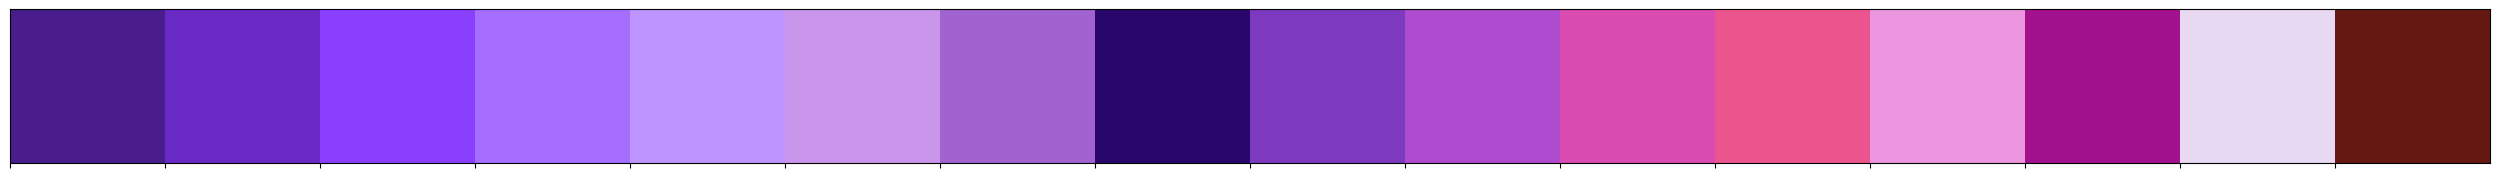

In [7]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)

In [8]:
# Provided link is dead.  Data was found elsewhere online.
wine = pd.read_csv('./winequality-red.csv')
df = wine.copy()
df.head(n=10).style.background_gradient(cmap = "Purples_r")


In [ ]:
# 위의 코드 블록에서는 데이터셋을 로드합니다.
# 그러면 만일의 경우에 대비하여 데이터셋의 복사본을 얻게 됩니다.
# 왜냐하면 어떤 경우에는 원래의 데이터셋을 사용해야 할 수도 있기 때문입니다.

In [ ]:
# 데이터셋에 대한 초기 정보
# 기본 정보 가져오기
df.info()

In [ ]:
# 데이터셋에 null 값이 없는 것으로 나타남
# 데이터셋을 1599개의 행과 12개의 열로 구성됨
# 모든 변수의 데이터 유형은 숫자임

In [9]:
df.describe().T.style.background_gradient(cmap = "magma")

In [10]:
print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))

Totally there are 0 null values in the dataset


In [ ]:
# 데이터 집합에 null 값이 없습니다. 데이터 집합의 총 "null" 값이 0입니다

In [11]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [ ]:
# 이름 바꾸기

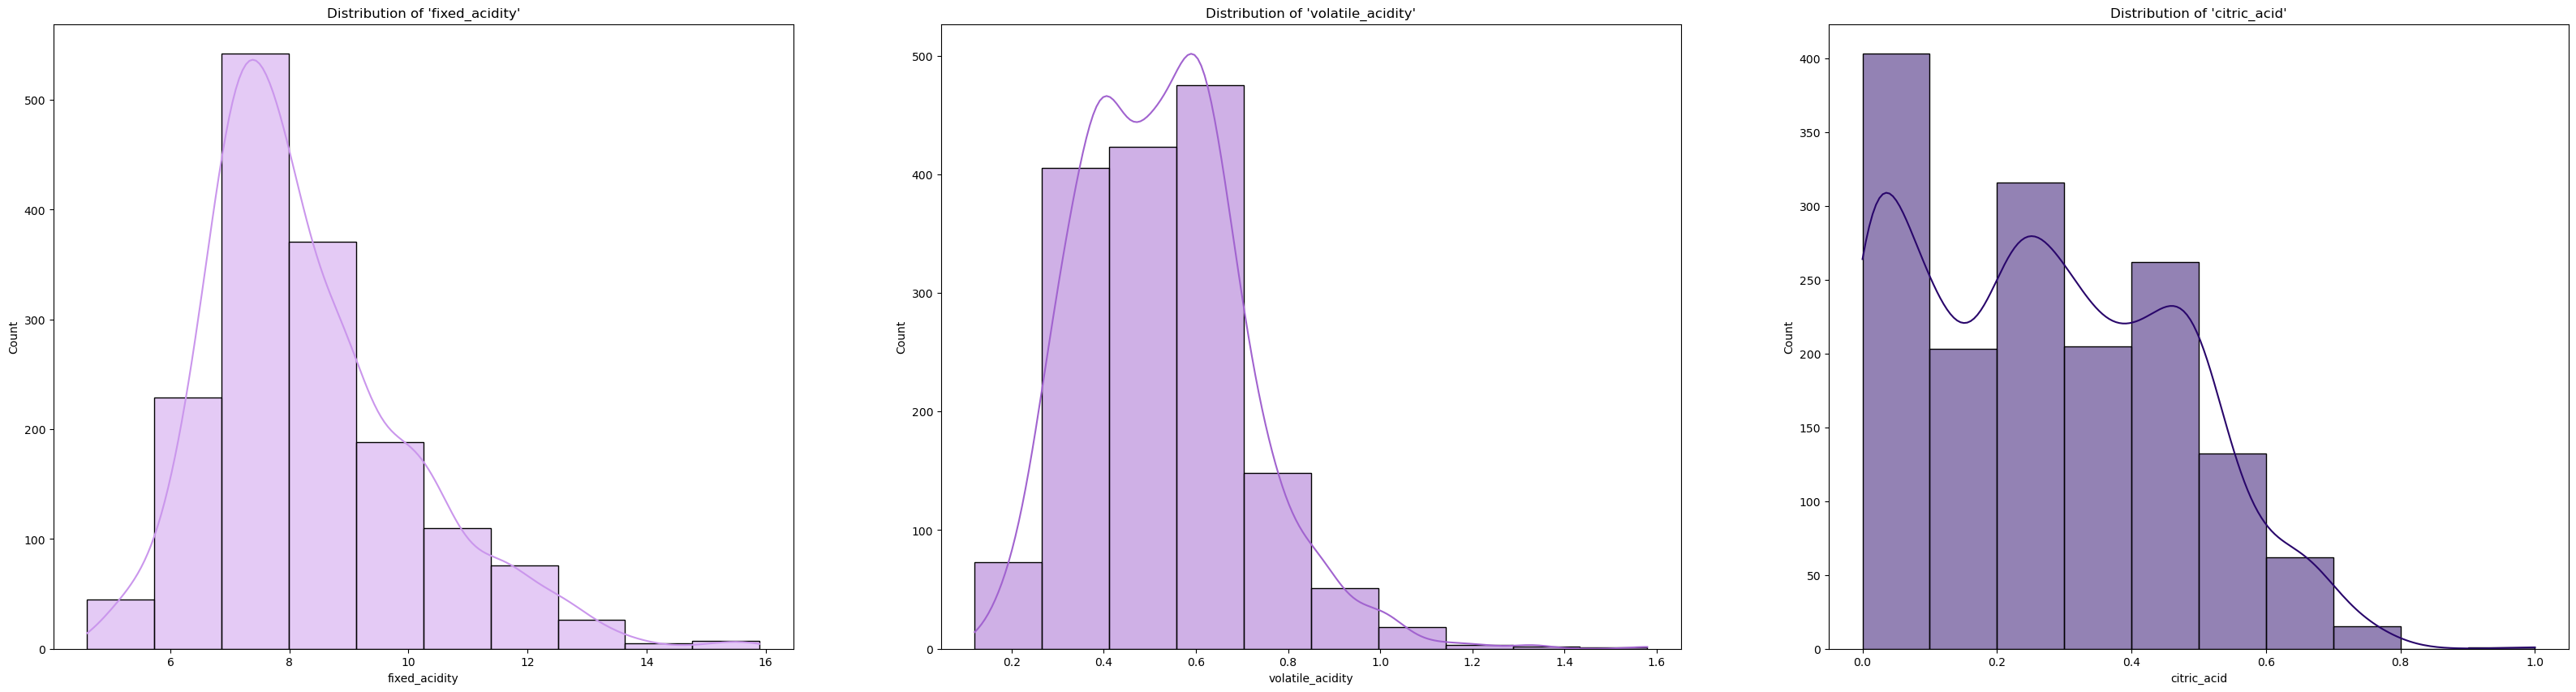

In [12]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = df["fixed_acidity"], 
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'fixed_acidity'");

sns.histplot(ax = axes[1], x = df["volatile_acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'volatile_acidity'");

sns.histplot(ax = axes[2], x = df["citric_acid"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric_acid'");

In [ ]:
#여기서 그래프를 분석하면 'fixed_acidity' 변수의 값이 
#비교적 정규 분포를 보이지만(그러나 약간 왼쪽으로 치우쳐 있음),
#다른 'volatile_acid' 변수와 'citric_acid' 변수의 분포에는 두 개의 피크가 있습니다.


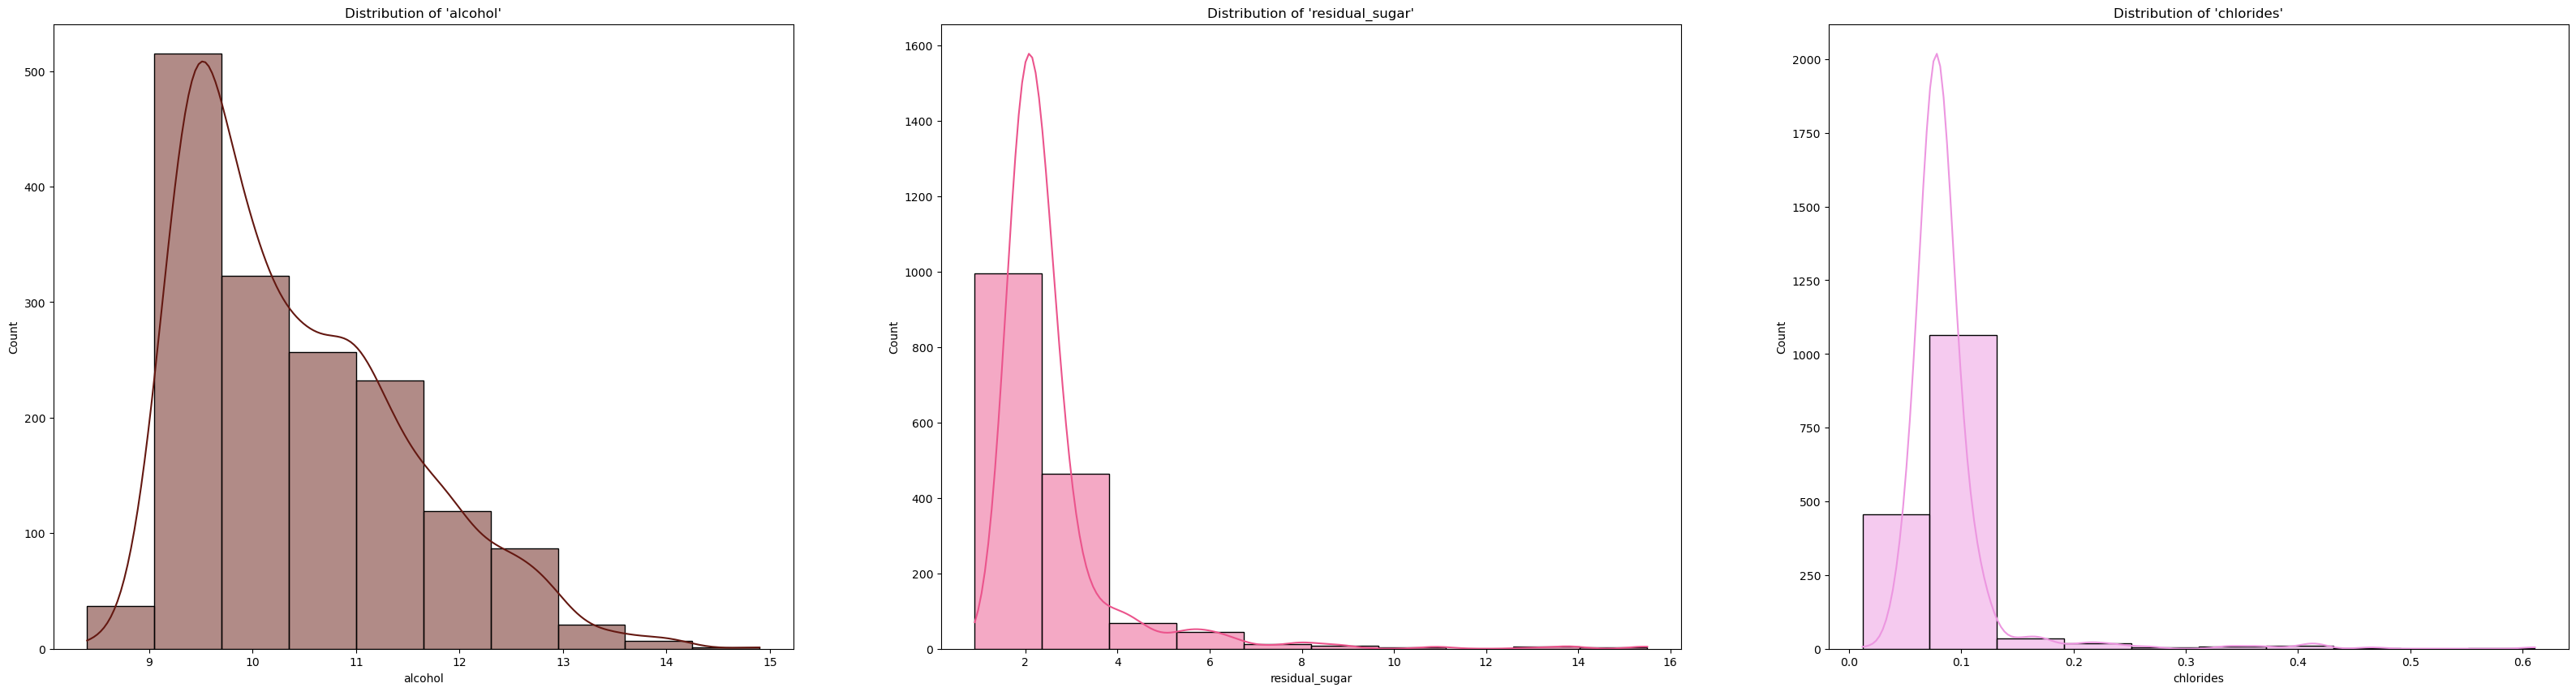

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax = axes[0], x = df["alcohol"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#641811").set(title = "Distribution of 'alcohol'");

sns.histplot(ax = axes[1], x = df["residual_sugar"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#EB548C").set(title = "Distribution of 'residual_sugar'");

sns.histplot(ax = axes[2], x = df["chlorides"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#EC96E0").set(title = "Distribution of 'chlorides'");

In [ ]:
#이 변수들의 분포가 정규 분포가 아님을 알 수 있습니다

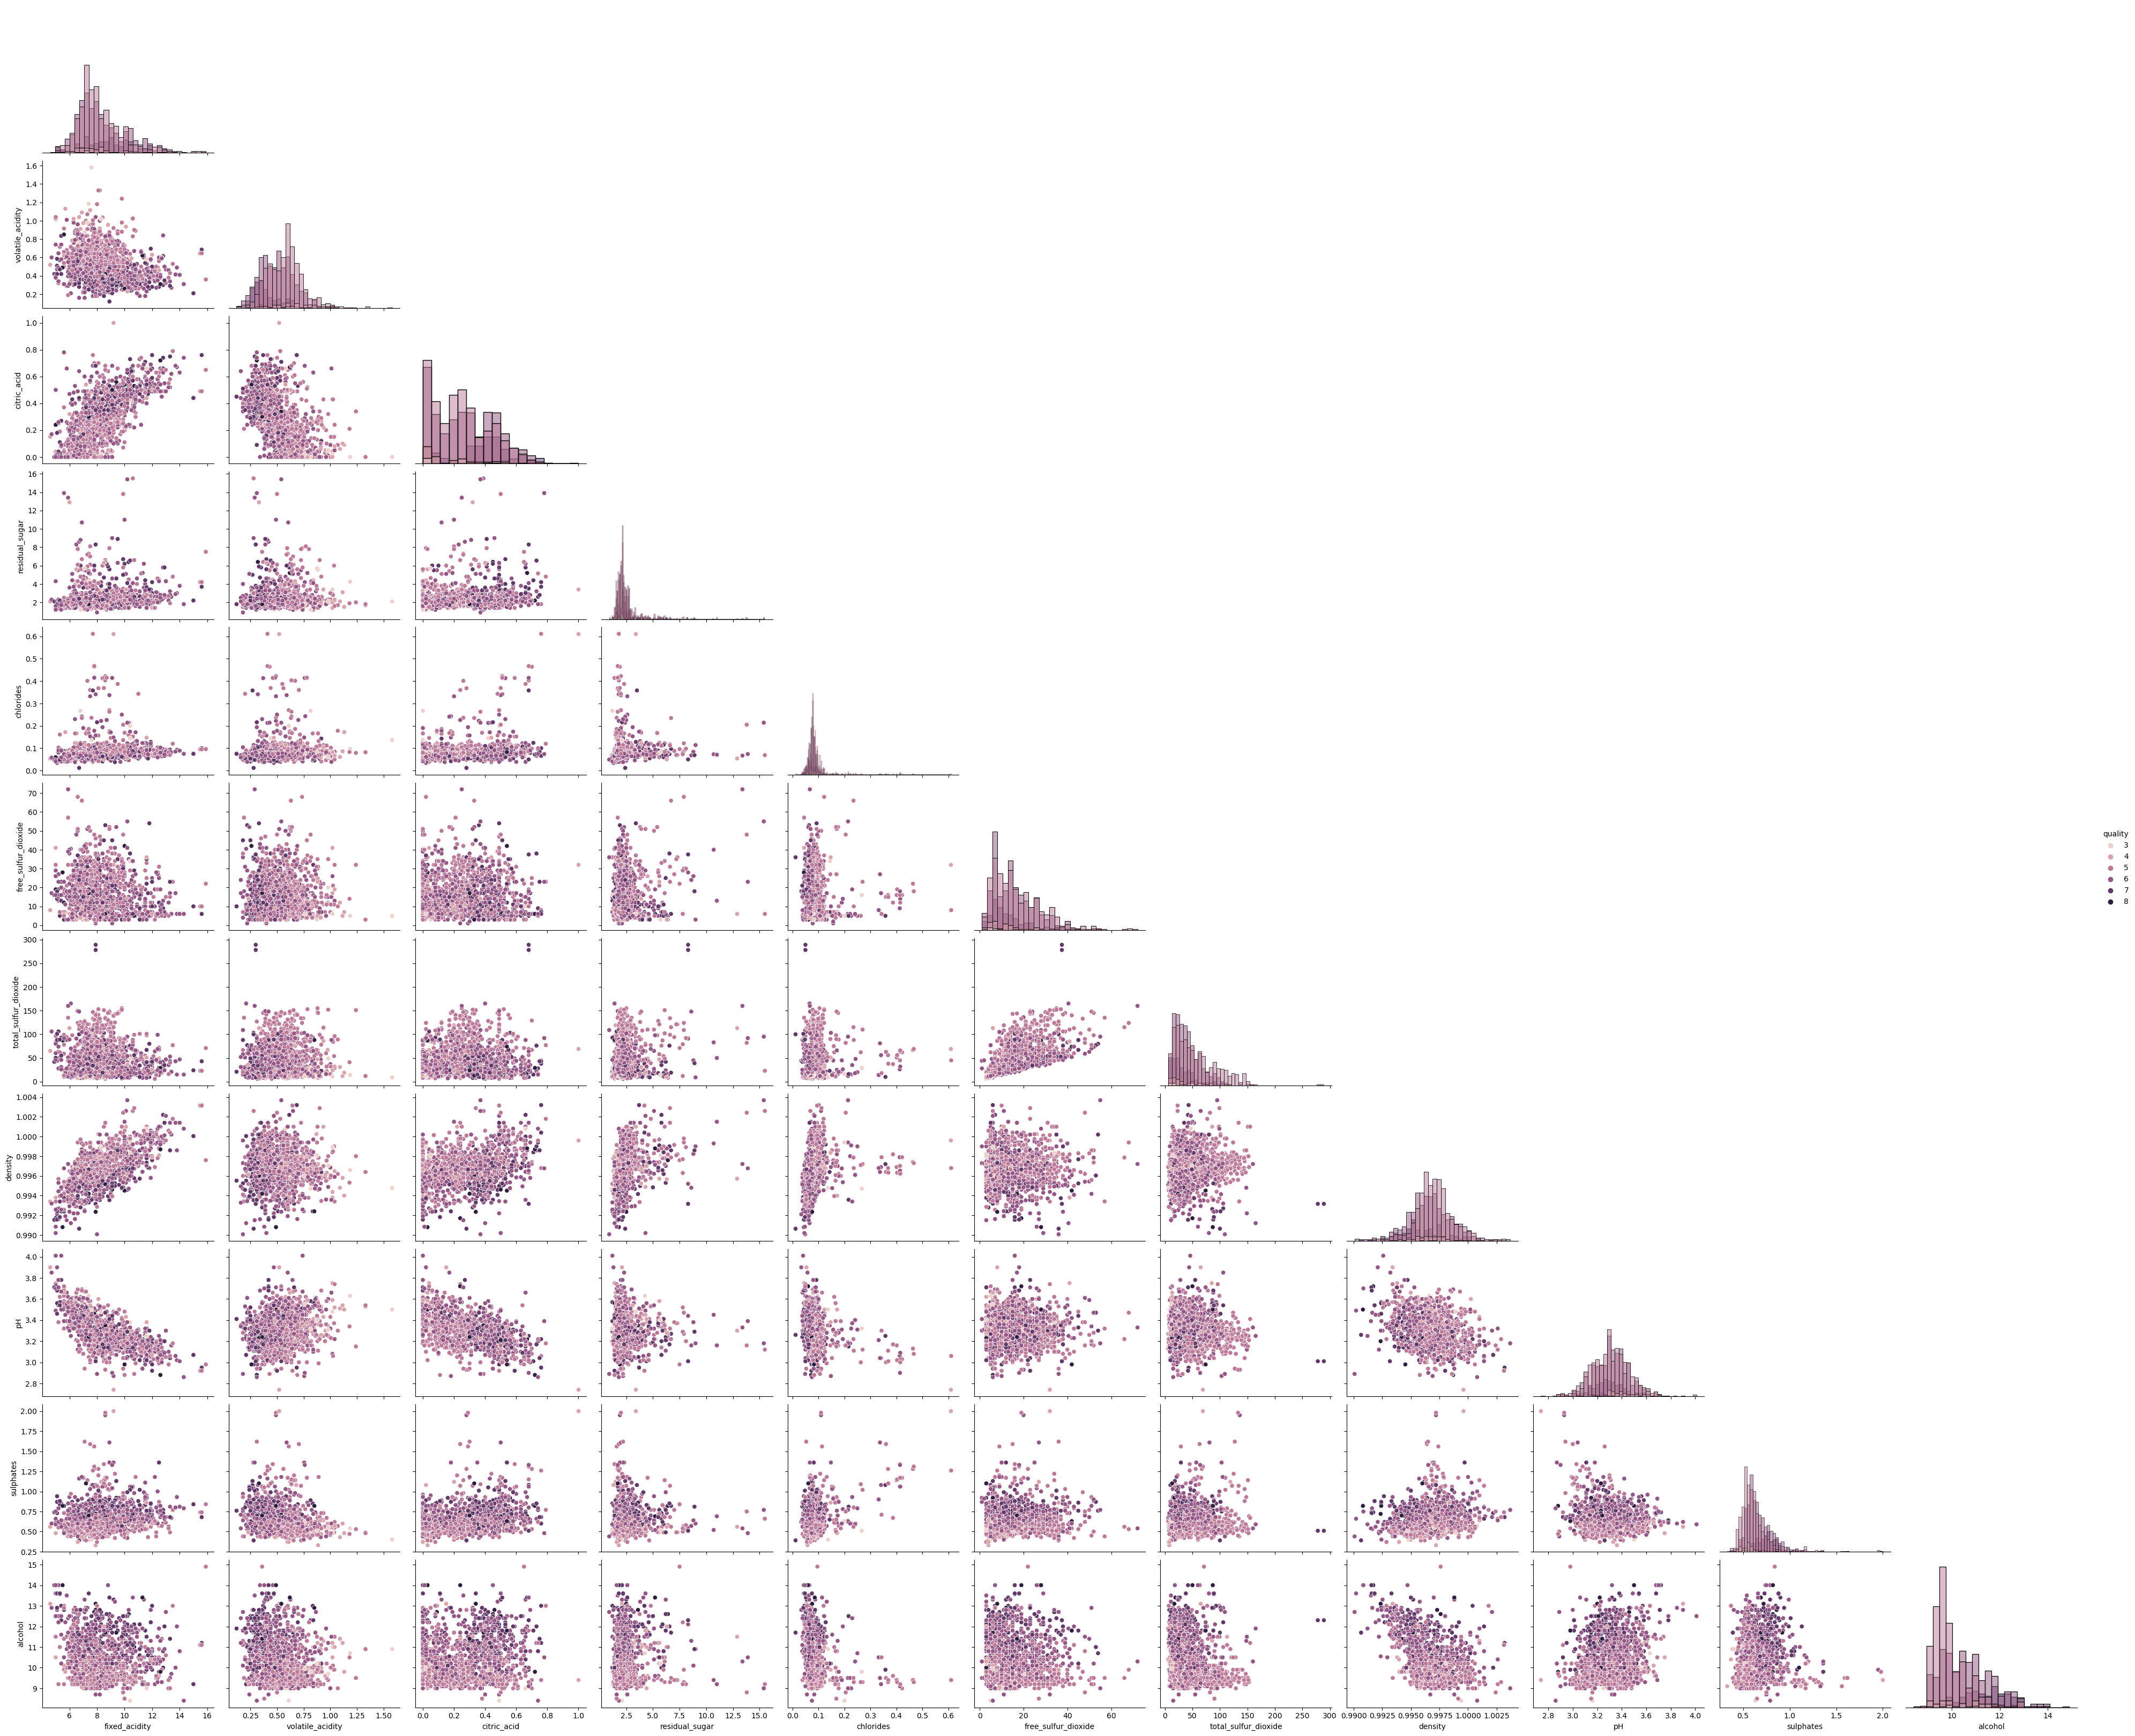

In [14]:
# pairplot
sns.pairplot(df, diag_kind = "hist", 
             hue = "quality", height = 3, aspect = 1.2, corner = True);

In [ ]:
#우리는 여기서 일부 변수들 사이에 상관관계가 있다는 것을 봅니다.
#그리고 이것이 우리가 원하지 않는 것입니다.
#이 문제를 '다중공선성'이라고 합니다

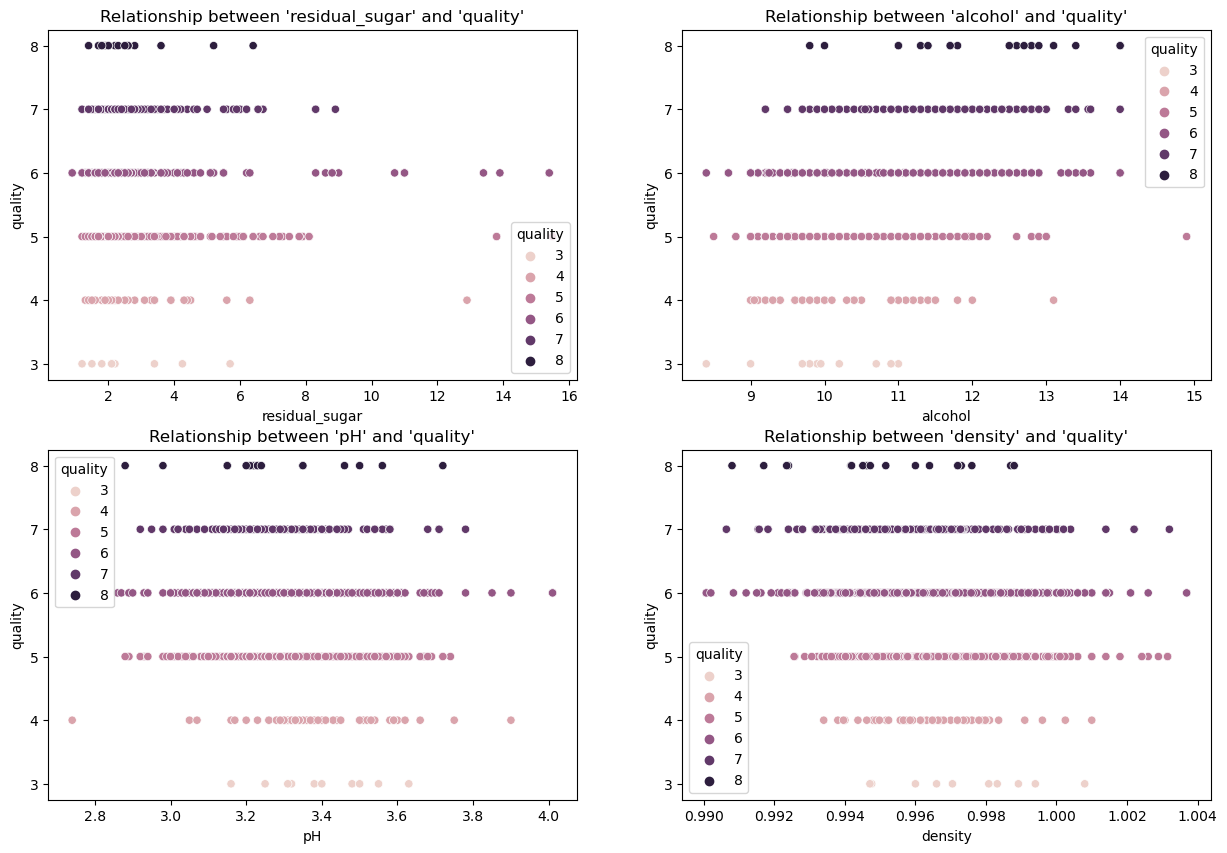

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "residual_sugar",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'density' and 'quality'");


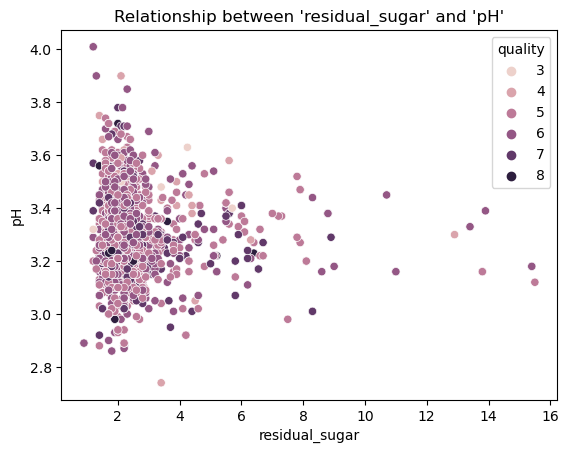

In [19]:
sns.scatterplot(x = "residual_sugar",
                y = "pH",
                hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'pH'");

In [ ]:
#알 수 있듯이 'residual_sugar'와 'pH' 변수 간에는 상관관계가 없습니다

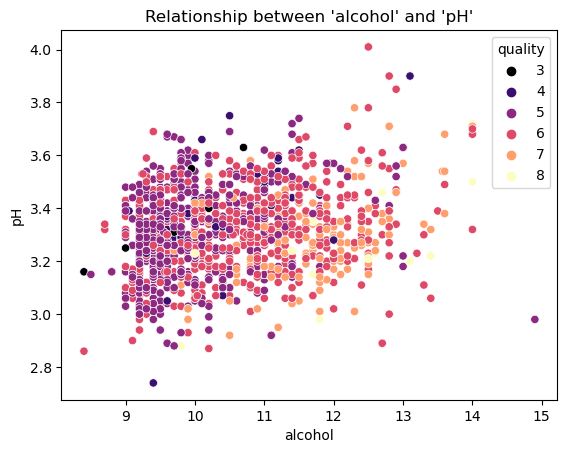

In [20]:
sns.scatterplot(x = "alcohol",
                y = "pH",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'alcohol' and 'pH'");

In [ ]:
# '알코올'과 'pH' 변수 사이에는 상관관계가 없습니다

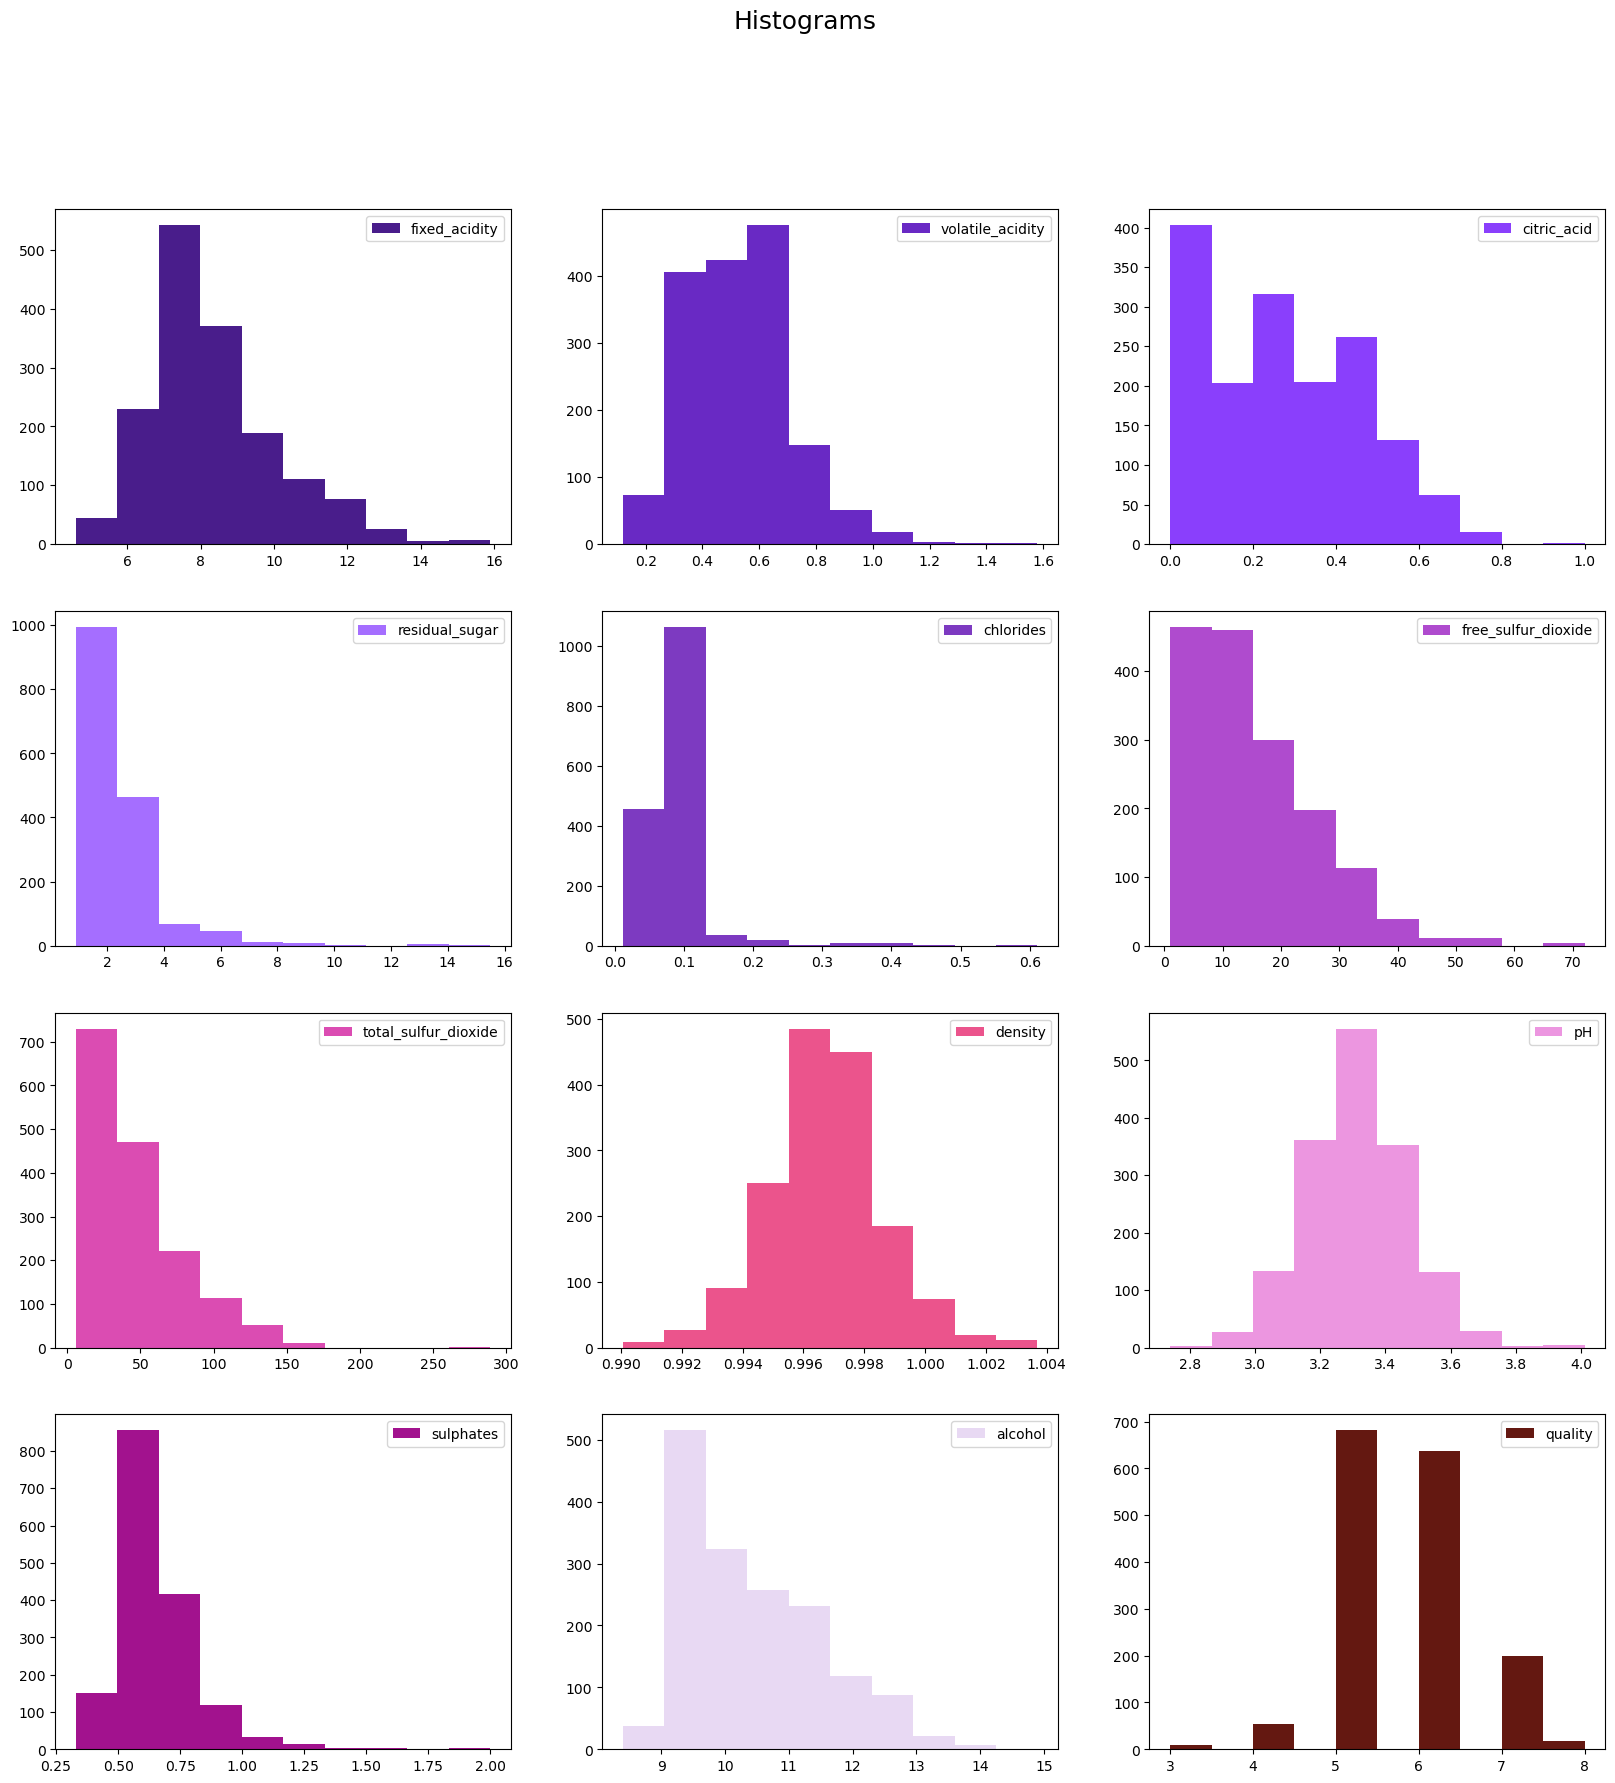

In [21]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index, column in enumerate(df.columns):
    ax = axes.flatten()[index]
    ax.hist(df[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()

In [ ]:
#결과적으로, 이 코드는 데이터프레임 df의 각 열에 대한 히스토그램을 생성하고 서브플롯에 배치하여 시각화합니다. 
#각 히스토그램은 서로 다른 색상으로 구분되며, 각 열의 이름이 해당 히스토그램의 범례에 표시됩니다. 
#이를 통해 데이터의 분포를 열 별로 비교하고 분석할 수 있습니다.
#'pH'와 '밀도' 변수들의 값은 비교적 정규적으로 분포되어 있습니다.

In [ ]:
#"fixed_acidity" 변수의 값은 대부분 7~8 범위입니다;

#"volatile_acidity" 변수 값의 대부분은 0.4~0.7 범위입니다;

#"citric_acid" 변수의 대부분의 값은 0.0 - 0.1 범위입니다;

#"residual_sugar" 변수의 값은 대부분 1 - 2.5 범위입니다;

#"염산염" 변수 값의 대부분은 0.085 - 0.15 범위입니다;

#"free_sulfur_dioxide" 변수의 대부분 값은 0 - 15 범위입니다;

#"total_sulfur_dioxide" 변수의 대부분의 값은 0 - 30 범위입니다;

#"밀도" 변수의 대부분의 값은 0.996 - 0.998 범위입니다;

#"pH" 변수 값의 대부분은 3.2~3.4 범위입니다;

#"황산염" 변수의 값은 대부분 0.50 ~ 0.75 범위입니다;

#"알코올" 변수의 값은 대부분 9~10 범위입니다;

"품질" 변수의 대부분의 값은 5와 6입니다.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [30]:
knn = KNeighborsClassifier()

In [31]:
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

NameError: name 'x_train' is not defined